In [1]:
print('[Info]: Importing Libraries...')

import os
import pandas as pd
import numpy as np
# from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Configure visualisations
%matplotlib inline
sns.set_style( 'white' )

print('\n[Info]: Import Complete...')

[Info]: Importing Libraries...

[Info]: Import Complete...


In [2]:
# #unzipping data file
# !unzip -qq ML_Artivatic_dataset.zip
# %cd ML_Artivatic_dataset

In [3]:
print('[Info]: Data Loading...')
data = pd.read_csv('train_indessa.csv')
print('Shape of the Data {}'.format(data.shape))

[Info]: Data Loading...
Shape of the Data (532428, 45)


In [4]:
# Few Helper Functions

### pivot_table for two categorical features one being loan_status
def pivot(col): 
    return pd.pivot_table(data,'member_id',index=[col],
                          columns=['loan_status'],aggfunc='count')

def bar_graph(col):
    df = pivot(col)
    name_x = list(df.index)
    y1 = df[1].values/532428.0
    y0 = df[0].values/532428.0
    x = np.array(range(1,len(name_x)+1))    

    fig= plt.figure()
    ax = fig.add_subplot(111)
    ax.bar(x-0.25,y0,width=0.25,color='g')
    ax.bar(x,y1,width=0.25,color='r')

    ax.set_ylabel(col)
    ax.set_title("{} vs defaulter(0,1)".format(col))
    ax.set_xticks(x)
    ax.set_xticklabels(name_x)
    ax.legend(['0','1'], loc='best')
    plt.xticks(rotation=70)
    plt.show()
    return

def drop_features(df, cols):
    for col in cols:
        del df[col]

def create_dummy(df,col):
    df_col = pd.get_dummies(df[col], prefix = col)
    df = pd.concat([df, df_col], axis=1)
    return df.drop([col], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [6]:
# to Check if NULL Values Not Present Present
data.isnull().sum()/len(data)*100

member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
batch_enrolled                 15.992585
int_rate                        0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.791018
emp_length                      5.050636
home_ownership                  0.000000
annual_inc                      0.000563
verification_status             0.000000
pymnt_plan                      0.000000
desc                           85.801085
purpose                         0.000000
title                           0.016904
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.003005
inq_last_6mths                  0.003005
mths_since_last_delinq         51.190771
mths_since_last_

In [7]:
# removing the feature if more that 50% of the data is missing
missing_value_feat = ['desc', 'mths_since_last_delinq', 'mths_since_last_record',
                     'mths_since_last_major_derog', 'verification_status_joint']

In [8]:
drop_features(data, missing_value_feat)

### Dropping 'term' feature

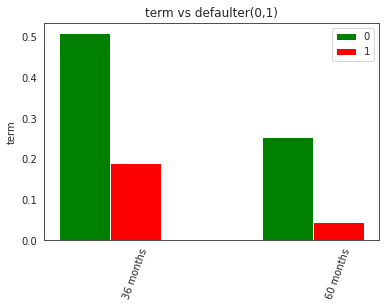

In [9]:
bar_graph('term')

In [10]:
# Creating a list of features to drop
features_to_drop = ['term']

### Dropping 'batch_enrolled' feature

In [11]:
item_counts = data.batch_enrolled.value_counts(normalize=True)
print(item_counts)

              0.237165
BAT2252229    0.042012
BAT3873588    0.039883
BAT2803411    0.038256
BAT2078974    0.033221
                ...   
BAT4347689    0.000067
BAT4884699    0.000065
BAT5869156    0.000058
BAT5077496    0.000040
BAT2331079    0.000029
Name: batch_enrolled, Length: 104, dtype: float64


In [12]:
# Adding 'batch_enrolled' to drop list
features_to_drop.append('batch_enrolled')

### Converting "int_rate" into bins

In [13]:
data.int_rate.describe()

count    532428.000000
mean         13.242969
std           4.379611
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64

#### Since "int_rate" is varible we will divide it into three types.
Low, mid and high based on mean and standard deviation.

int_rate == low if int_rate <= Mean-SD \
int_rate == mid if Mean+SD > int_rate > Mean-SD \
int_rate == high if int_rate >= Mean+SD

In [14]:
int_rate_bins = pd.cut(data.int_rate, bins = [5,9,17,29],
                       labels=['low', 'mid', 'high'])
data.insert(7,'int_rate_bins',int_rate_bins)

In [15]:
data = create_dummy(data, 'int_rate_bins')

In [16]:
# Adding 'int_rate' and to drop list
features_to_drop.append('int_rate')

### Creating Dummy for 'grade'

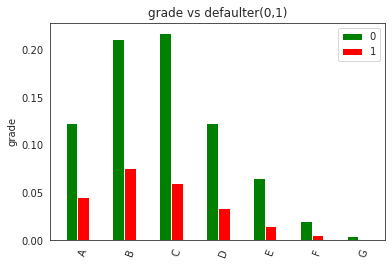

In [17]:
bar_graph('grade')

In [18]:
data = create_dummy(data, 'grade')

### Dropping 'sub_grade' feature 

As majority of the information needed is covered by 'grade'

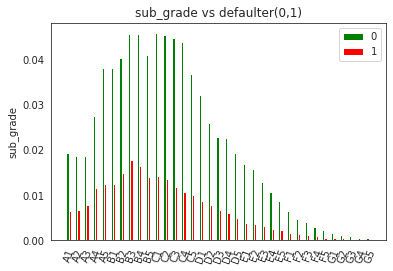

In [19]:
bar_graph('sub_grade')

In [20]:
# Adding 'sub_grade' to drop list
features_to_drop.append('sub_grade')

### Dropping 'emp_title' feature

In [21]:
item_counts = data.emp_title.value_counts(normalize=True)
print(item_counts)

Teacher                  0.016507
Manager                  0.013800
Registered Nurse         0.006752
Owner                    0.006589
RN                       0.006489
                           ...   
A Storage Place          0.000002
HOND AOF SEATTLE         0.000002
RN IV Nurse Manager      0.000002
production asscociate    0.000002
Child care worker        0.000002
Name: emp_title, Length: 190124, dtype: float64


In [22]:
# Adding 'emp_title' to drop list
features_to_drop.append('emp_title')

### Converting 'emp_length' to Readable format

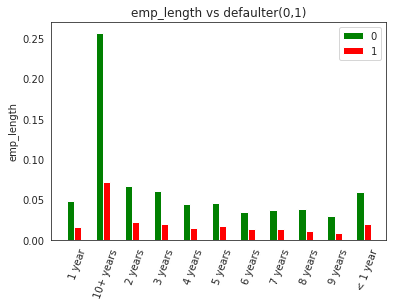

In [23]:
bar_graph('emp_length')

In [24]:
print('[Info]: Transforming: emp_length...')
data['emp_length'].replace('n/a', '0', inplace=True)
data['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
data['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
data['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
data['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
data['emp_length'] = pd.to_numeric(data['emp_length'], errors='coerce')

[Info]: Transforming: emp_length...


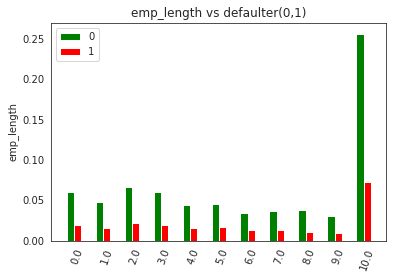

In [25]:
bar_graph('emp_length')

### Mapping 'home_ownership' to three classes

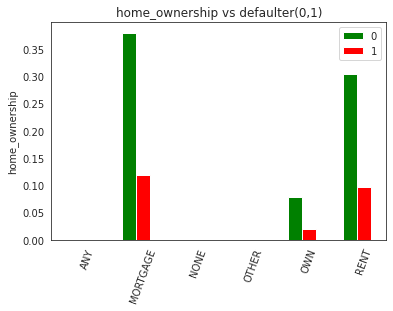

In [26]:
bar_graph('home_ownership')

In [27]:
# data['home_ownership'].value_counts(normalize=True)

In [28]:
# data['home_ownership'] = data['home_ownership'].map({
#     'NONE': 'low',
#     'OTHER': 'low',
#     'ANY': 'low',
#     'RENT': 'mid',
#     'OWN' : 'high',
#     'MORTGAGE': 'high'
# })

In [29]:
# data = create_dummy(data, 'home_ownership')

In [30]:
# Adding 'home_ownership' to drop list
features_to_drop.append('home_ownership')

### No change in 'annunal_inc'

### Creating Dummy Variable for 'verification_status'

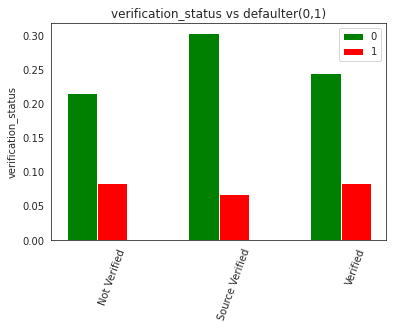

In [31]:
bar_graph('verification_status')

In [32]:
data = create_dummy(data, 'verification_status')

### Dropping 'pymnt_plan'

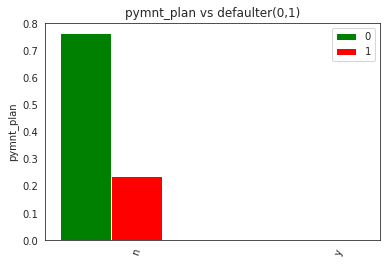

In [33]:
bar_graph('pymnt_plan')

In [34]:
# data = create_dummy(data, 'pymnt_plan')

In [35]:
features_to_drop.append('pymnt_plan')

### Creating Dummy for 'purpose' feature

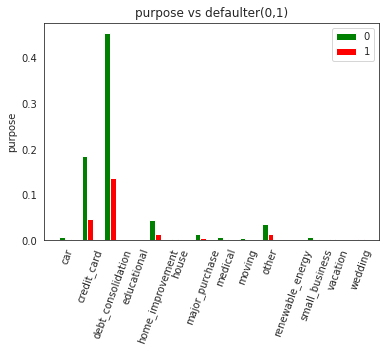

In [36]:
bar_graph('purpose')

In [37]:
data = create_dummy(data, 'purpose')

### Dropping 'title', 'zip_code' and 'addr_state'

In [38]:
# Adding 'title', 'zip_code', 'addr_state' to drop list
features_to_drop.extend(['title', 'zip_code', 'addr_state'])

### Dropping 'initial_list_status' feature

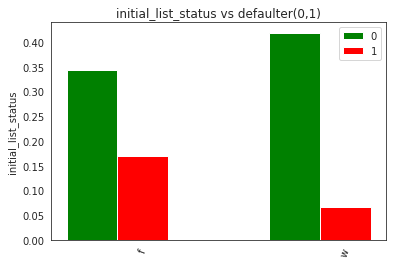

In [39]:
bar_graph('initial_list_status')

In [40]:
# data = create_dummy(data, 'initial_list_status')

In [41]:
features_to_drop.append('initial_list_status')

### Dropping 'application_type'

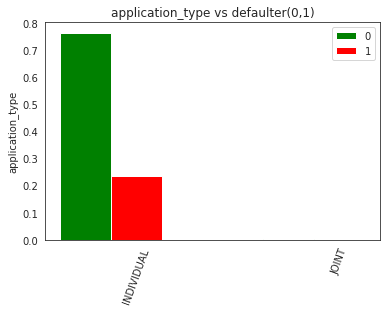

In [42]:
bar_graph('application_type')

In [43]:
# data = create_dummy(data, 'application_type')

In [44]:
features_to_drop.append('application_type')

### Dropping 'last_week_pay' feature

In [45]:
# Adding 'last_week_pay' to drop list
features_to_drop.append('last_week_pay')

In [46]:
# Additional Drops to reduce training Parameters
features_to_drop.append('collection_recovery_fee')

In [47]:
drop_features(data, features_to_drop)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   member_id                            532428 non-null  int64  
 1   loan_amnt                            532428 non-null  int64  
 2   funded_amnt                          532428 non-null  int64  
 3   funded_amnt_inv                      532428 non-null  float64
 4   emp_length                           505537 non-null  float64
 5   annual_inc                           532425 non-null  float64
 6   dti                                  532428 non-null  float64
 7   delinq_2yrs                          532412 non-null  float64
 8   inq_last_6mths                       532412 non-null  float64
 9   open_acc                             532412 non-null  float64
 10  pub_rec                              532412 non-null  float64
 11  revol_bal    

In [49]:
# Saving the modified file
data.to_csv('train_modified.csv', encoding='utf-8', index=False)

In [50]:
data_test = pd.read_csv('test_indessa.csv')

In [51]:
# applying all the changes done to train set, to test set

print('[Info]: Making changes to Test Data')

print('[Info]: Removing missing value Features')
drop_features(data_test, missing_value_feat)

print('[Info]: Converting "int_rate" into Bins')
int_rate_bins = pd.cut(data_test.int_rate, bins = [5,9,17,29],
                       labels=['low', 'mid', 'high'])
data_test.insert(7,'int_rate_bins',int_rate_bins)

print('[Info]: Creating Dummy for "int_rate_bins"')
data_test = create_dummy(data_test, 'int_rate_bins')

print('[Info]: Creating Dummy for "grade" into Bins')
data_test = create_dummy(data_test, 'grade')

print('[Info]: Changing "emp_length" to Readable Form')
data_test['emp_length'].replace('n/a', '0', inplace=True)
data_test['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
data_test['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
data_test['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
data_test['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
data_test['emp_length'] = pd.to_numeric(data_test['emp_length'], errors='coerce')

# print('[Info]: Creating Bins for "home_ownership"')
# data_test['home_ownership'] = data_test['home_ownership'].map({
#     'NONE': 'low',
#     'OTHER': 'low',
#     'ANY': 'low',
#     'RENT': 'mid',
#     'OWN' : 'high',
#     'MORTGAGE': 'high'})

# print('[Info]: Creating Dummy for "home_ownership"')
# data_test = create_dummy(data_test, 'home_ownership')

print('[Info]: Creating Dummy for "verification_status"')
data_test = create_dummy(data_test, 'verification_status')

# print('[Info]: Creating Dummy for "pymnt_plan"')
# data_test = create_dummy(data_test, 'pymnt_plan')

print('[Info]: Creating Dummy for "purpose"')
data_test = create_dummy(data_test, 'purpose')

# print('[Info]: Creating Dummy for "initial_list_status"')
# data_test = create_dummy(data_test, 'initial_list_status')

# print('[Info]: Creating Dummy for "application_type"')
# data_test = create_dummy(data_test, 'application_type')

print('[Info]: Dropping Undesired Features')
drop_features(data_test, features_to_drop)

print('\n[Info]: All necessory changes are Completed')

[Info]: Making changes to Test Data
[Info]: Removing missing value Features
[Info]: Converting "int_rate" into Bins
[Info]: Creating Dummy for "int_rate_bins"
[Info]: Creating Dummy for "grade" into Bins
[Info]: Changing "emp_length" to Readable Form
[Info]: Creating Dummy for "verification_status"
[Info]: Creating Dummy for "purpose"
[Info]: Dropping Undesired Features

[Info]: All necessory changes are Completed


In [52]:
# Saving the modified file
data_test.to_csv('test_modified.csv', encoding='utf-8', index=False)

In [53]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354951 entries, 0 to 354950
Data columns (total 49 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   member_id                            354951 non-null  int64  
 1   loan_amnt                            354951 non-null  int64  
 2   funded_amnt                          354951 non-null  int64  
 3   funded_amnt_inv                      354951 non-null  float64
 4   emp_length                           337017 non-null  float64
 5   annual_inc                           354950 non-null  float64
 6   dti                                  354951 non-null  float64
 7   delinq_2yrs                          354938 non-null  float64
 8   inq_last_6mths                       354938 non-null  float64
 9   open_acc                             354938 non-null  float64
 10  pub_rec                              354938 non-null  float64
 11  revol_bal    